**What is OpenCV?**
OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It was built to provide a common infrastructure for computer vision applications

**What is PIL?**
PIL (Python Imaging Library) is an open-source image processing package for Python language. It incorporates lightweight image processing tools that aids in editing, creating and saving images

# **OpenCV**

Installing OpenCV in Python

In [ ]:
!pip install opencv-python

Once installed, import the library with the alias pd

In [ ]:
import cv2

Checking OpenCV Version

In [ ]:
print(cv2.__version__)

4.12.0


# Image Basics using OpenCV

Read Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
img_path = '/content/drive/MyDrive/blackcar.jpg'  # Replace with your actual path
df = cv2.imread(img_path)

Mounted at /content/drive


Show Image

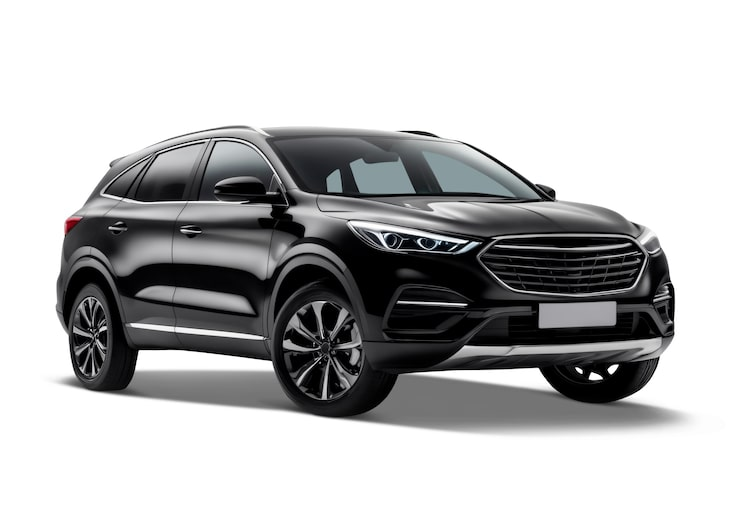

In [ ]:
from google.colab.patches import cv2_imshow

# Display the image
cv2_imshow(df)
cv2.waitKey(0)
cv2.destroyAllWindows()

Write Image

In [ ]:
# Save the image to a file
cv2.imwrite('output.jpg', df)

True

Resize Image

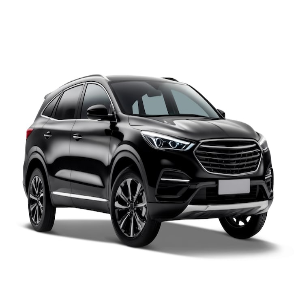

In [ ]:
resized_image = cv2.resize(df, (300, 300))
cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Converting to Grayscale

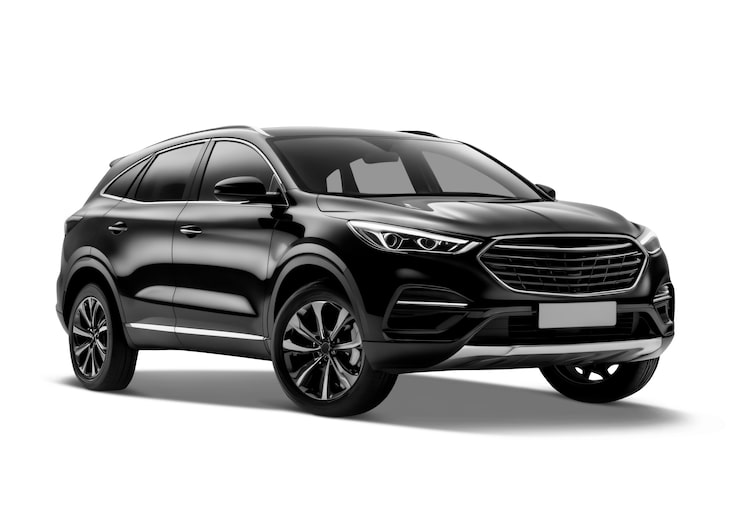

In [ ]:
gray_image = cv2.cvtColor(df, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Drawing Functions

Drawing a Line

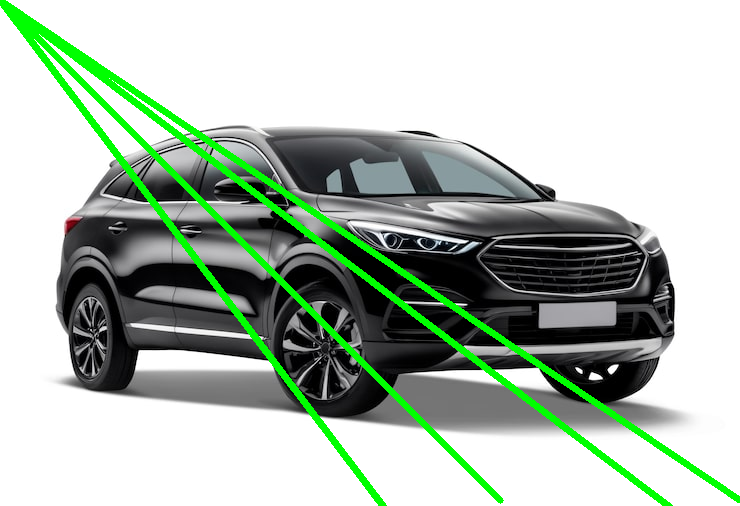

In [ ]:
cv2.line(df, (0, 0), (740, 500), (0, 255, 0), 5)
cv2_imshow(df)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
df.shape[1]

740

Drawing a Rectangle

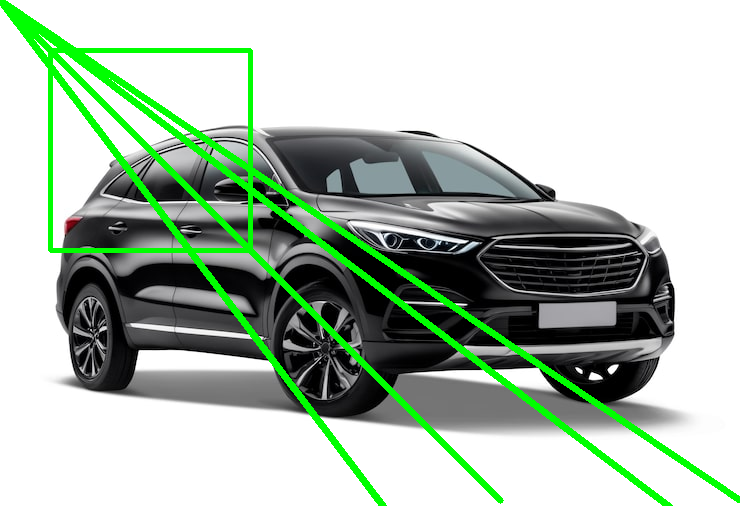

In [ ]:
cv2.rectangle(df, (50, 50), (250, 250), (0, 255, 0), 3)
cv2_imshow(df)
cv2.waitKey(0)
cv2.destroyAllWindows()

Drawing a Circle

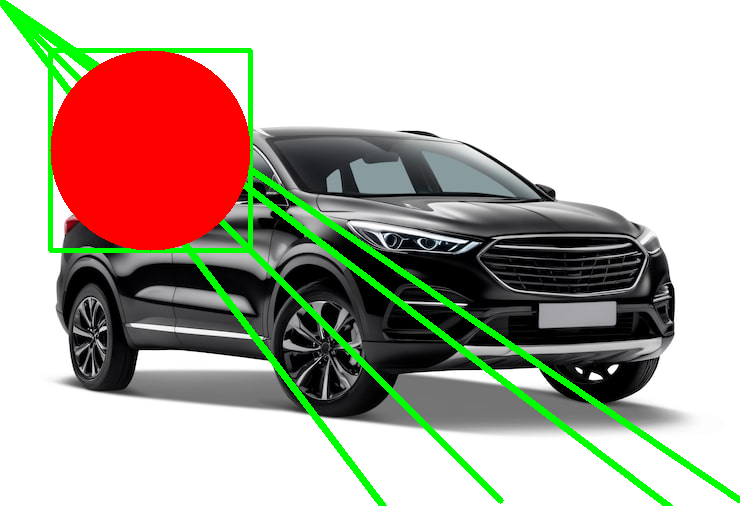

In [ ]:
cv2.circle(df, (150, 150), 100, (0, 0, 255), -1)
cv2_imshow(df)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text

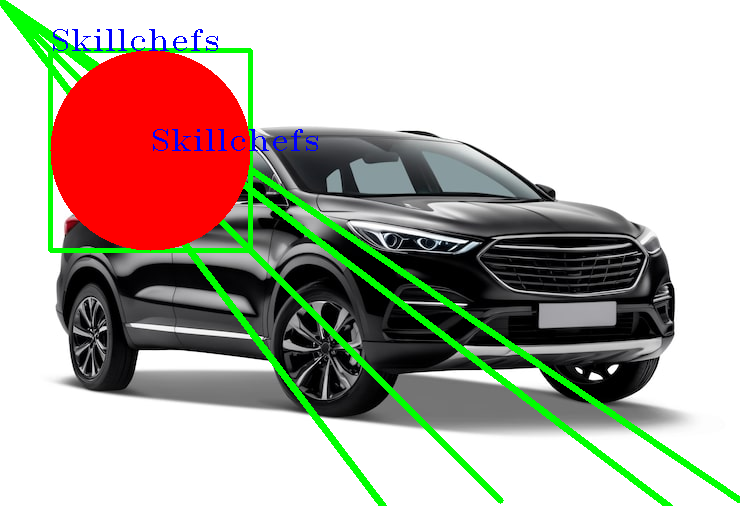

In [ ]:
cv2.putText(df, "Skillchefs", (50, 50), 100, cv2.FONT_HERSHEY_PLAIN, (255, 0, 0), 1)
cv2_imshow(df)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Processing

Edge Detection using Canny

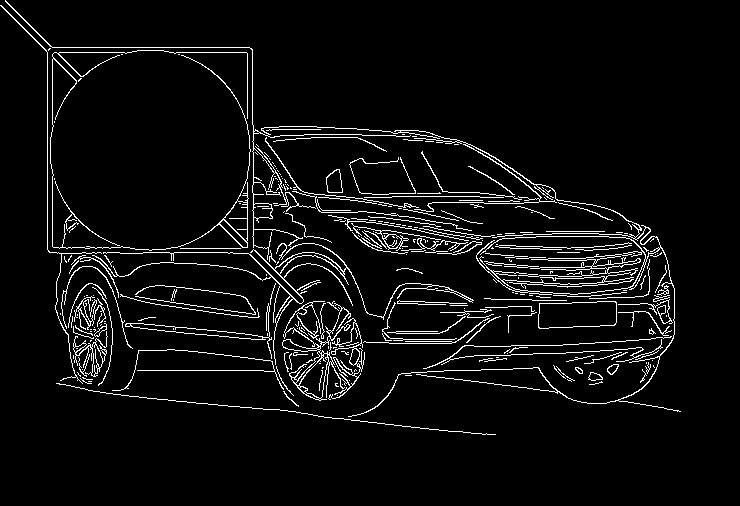

In [ ]:
edges = cv2.Canny(df, 100, 200)
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gaussian Blurring

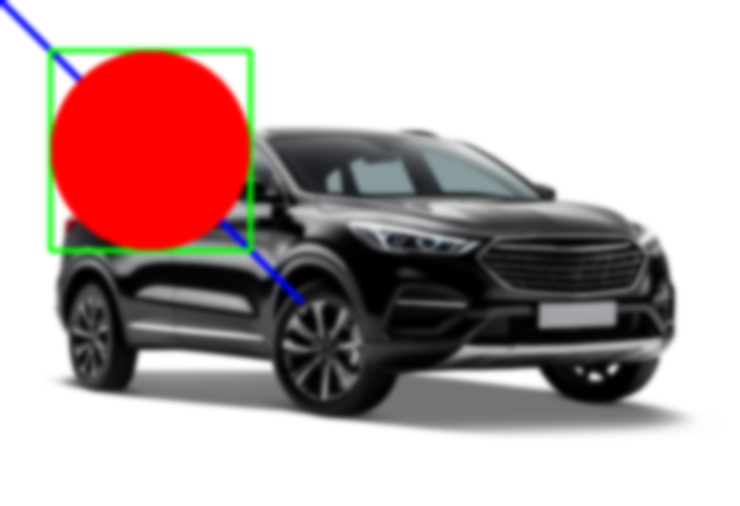

In [ ]:
blurred_image = cv2.GaussianBlur(df, (15, 15), 0)
cv2_imshow(blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thresholding

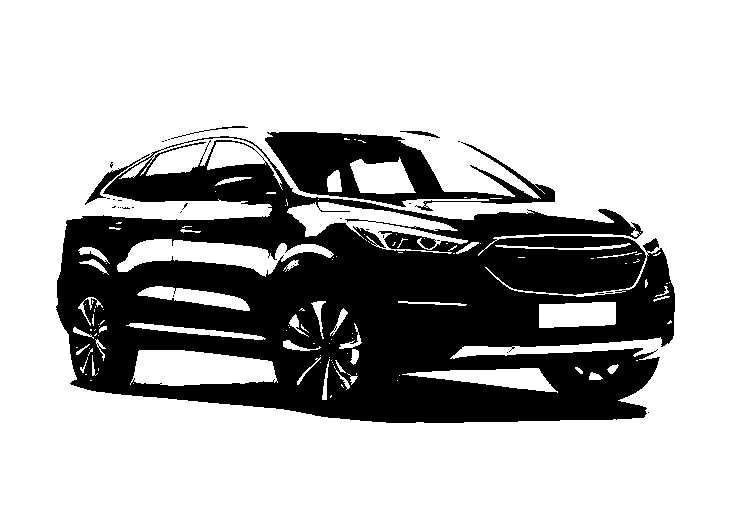

In [ ]:
ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Video Processing

Reading and Displaying a Video

In [ ]:
# Load the dataset
vid_path = '/content/drive/MyDrive/car.mp4'  # Replace with your actual path
cap = cv2.VideoCapture(vid_path)

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2_imshow(frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        out.write(frame)
        cv2_imshow(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

# **PIL**

In [ ]:
!pip install pillow

Read and Show Image

In [ ]:
from PIL import Image

car = '/content/drive/MyDrive/blackcar.jpg'
img = Image.open(car)

In [ ]:
print(img.show())

None


In [ ]:
print(img.mode)

RGB


In [ ]:
print(img.size)

(740, 506)


In [ ]:
print(img.format)

JPEG


In [ ]:
angle = 40
r_img = img.rotate(angle)

In [ ]:
# উদাহরণ: 'ID' কলামের ভিত্তিতে দুটি টেবিল merge করা
data_A = pd.DataFrame({'ID': [1, 2], 'নাম': ['ক', 'খ']})
data_B = pd.DataFrame({'ID': [1, 3], 'স্কোর': [90, 85]})

# ID-র ভিত্তিতে Merging (যারা উভয় টেবিলে আছে)
merged_df = pd.merge(data_A, data_B, on='ID', how='inner')
print(merged_df)

   ID নাম  স্কোর
0   1   ক     90


# Working with Missing Data


1.   Drop
2.   Fill



In [ ]:
import numpy as np
data_with_nan = {'A': [1, 2, np.nan], 'B': [5, np.nan, 10], 'C': [1, 2, 3]}
df_nan = pd.DataFrame(data_with_nan)
print(df_nan)

     A     B  C
0  1.0   5.0  1
1  2.0   NaN  2
2  NaN  10.0  3


In [ ]:
df_dropped = df_nan.dropna()
print(df_dropped)

     A    B  C
0  1.0  5.0  1


In [ ]:
df_filled_zero = df_nan.fillna(0)
print(df_filled_zero)

     A     B  C
0  1.0   5.0  1
1  2.0   0.0  2
2  0.0  10.0  3


In [ ]:
mean_b = df_nan['B'].mean()
mean_a = df_nan['A'].mean()
df_nan['B'].fillna(mean_b, inplace=True) # inplace=True মানে আসল ডেটাফ্রেমে পরিবর্তন হবে
df_nan['A'].fillna(mean_a, inplace=True)
print(df_nan)

     A     B  C
0  1.0   5.0  1
1  2.0   7.5  2
2  1.5  10.0  3


/tmp/ipython-input-2619190824.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nan['B'].fillna(mean_b, inplace=True) # inplace=True মানে আসল ডেটাফ্রেমে পরিবর্তন হবে
/tmp/ipython-input-2619190824.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

# Handling Duplicate Values

In [ ]:
data_dup = {'ID': [1, 2, 2, 3], 'Score': [90, 85, 85, 92]}
df_dup = pd.DataFrame(data_dup)
print(df_dup)

   ID  Score
0   1     90
1   2     85
2   2     85
3   3     92


In [ ]:
df_unique = df_dup.drop_duplicates()
print(df_unique)

   ID  Score
0   1     90
1   2     85
3   3     92
